# Classification of EMOTIV EPOC 3 classes

## Import Library

In [48]:
import sys
import os
import joblib
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kaggle.api.kaggle_api_extended import KaggleApi
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(sys.executable)

/home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/bin/python


In [2]:
import torch
print(torch.cuda.is_available()) 

True


## Data Ingestion from Kaggle

In [3]:
# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Dataset path
kaggle_dataset = 'drammaraalhamadani/emotiv-epoc-3-classes'
output_dir = './kaggle_downloads'

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Download and unzip all files from the Kaggle dataset (download everything at once)
print("Downloading and unzipping all files from the dataset...")
api.dataset_download_files(kaggle_dataset, path=output_dir, force=True, unzip=True)
print("All files downloaded and unzipped to:", output_dir)

Dataset URL: https://www.kaggle.com/datasets/drammaraalhamadani/emotiv-epoc-3-classes
All files downloaded and unzipped to: ./kaggle_downloads


## Data Collection


### user_a

In [4]:
a = pd.read_csv("/home/quan/PROJECT/Machine Learning with Biomedical Signals/kaggle_downloads/user_a.csv")
print(a.head(3))
print(a.shape)
print(a.info())

   Class          AF3        AF3.1     AF3.2     AF3.3     AF3.4     AF3.5  \
0    1.0  3569.164550  2063.892754  1.673726  4.444736  0.526209  3.002088   
1    1.0  3568.423670  2063.099248  1.897790  3.728823  1.304186  1.854353   
2    1.0  3568.157929  2062.445859  2.798014  2.574504  1.120537  1.958819   

      AF3.6     AF3.7           F7  ...       F8.6       F8.7          AF4  \
0  1.425022  3.302739  3563.803888  ...  45.468326  72.508750  3701.186330   
1  1.366575  2.546458  3563.560922  ...  36.551948  66.931186  3725.210509   
2  0.982433  2.258622  3563.279981  ...  40.754308  66.816547  3724.417296   

         AF4.1      AF4.2      AF4.3      AF4.4      AF4.5      AF4.6  \
0  2182.676835  18.192418  41.349662  16.004756  42.046467  46.280843   
1  2180.197439   8.820788  38.012788  19.601233  29.431054  38.559351   
2  2176.823208  18.159202  23.612639  14.378291  19.555084  43.210004   

       AF4.7  
0  73.565719  
1  67.470041  
2  67.781924  

[3 rows x 113 column

### user_b

In [5]:
b = pd.read_csv("/home/quan/PROJECT/Machine Learning with Biomedical Signals/kaggle_downloads/user_b.csv")
print(b.head(3))
print(b.shape)
print(b.info())

   Class          AF3        AF3.1     AF3.2     AF3.3     AF3.4     AF3.5  \
0    2.0  3577.872723  2067.408557  1.025738  1.744496  0.883469  1.282893   
1    2.0  3577.830179  2066.857321  0.573598  1.711991  1.012575  1.900513   
2    2.0  3576.706494  2066.736837  0.525896  1.584096  0.201467  1.038686   

      AF3.6     AF3.7           F7  ...  AF4.69  AF4.70  AF4.71  Class.9  \
0  3.039058  2.730998  3568.553050  ...     NaN     NaN     NaN      NaN   
1  2.746218  3.066821  3569.060181  ...     NaN     NaN     NaN      NaN   
2  2.685631  2.977552  3569.214969  ...     NaN     NaN     NaN      NaN   

   AF3.72  AF3.73  AF3.74  AF3.75  AF3.76  AF3.77  
0     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN  

[3 rows x 1024 columns]
(2880, 1024)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Columns: 1024 entries, Class to AF3.77
dtypes: float64(1024)
m

### user_c

In [6]:
c = pd.read_csv("/home/quan/PROJECT/Machine Learning with Biomedical Signals/kaggle_downloads/user_c.csv")
print(c.head(3))
print(c.shape)
print(c.info())

   Class          AF3        AF3.1     AF3.2     AF3.3     AF3.4     AF3.5  \
0    1.0  3573.336166  2067.827798  1.334973  2.294574  0.742210  2.052755   
1    1.0  3569.424197  2063.871329  1.639684  2.573080  1.097168  2.678287   
2    1.0  3570.767652  2064.654687  0.706498  2.613442  1.086770  2.222977   

      AF3.6     AF3.7           F7  ...  AF4.69  AF4.70  AF4.71  Class.9  \
0  3.604952  4.854279  3575.508401  ...     NaN     NaN     NaN      NaN   
1  2.313650  4.727548  3573.524571  ...     NaN     NaN     NaN      NaN   
2  2.409857  4.936480  3573.935350  ...     NaN     NaN     NaN      NaN   

   AF3.72  AF3.73  AF3.74  AF3.75  AF3.76  AF3.77  
0     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN  

[3 rows x 1024 columns]
(2880, 1024)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Columns: 1024 entries, Class to AF3.77
dtypes: float64(1024)
m

### user_d

In [7]:
d = pd.read_csv("/home/quan/PROJECT/Machine Learning with Biomedical Signals/kaggle_downloads/user_d.csv")
print(d.head(3))
print(d.shape)
print(d.info())

   Class          AF3        AF3.1     AF3.2     AF3.3     AF3.4     AF3.5  \
0    1.0  3566.375438  2062.665095  1.040973  2.574824  1.376404  1.657806   
1    1.0  3565.986713  2061.826341  1.347088  2.154989  0.904145  2.603965   
2    1.0  3566.977885  2062.639807  1.083747  2.186981  1.155864  2.293261   

      AF3.6     AF3.7           F7  ...  AF4.69  AF4.70  AF4.71  Class.9  \
0  0.933377  2.429998  3564.653552  ...     NaN     NaN     NaN      NaN   
1  1.175508  2.292886  3564.071577  ...     NaN     NaN     NaN      NaN   
2  1.144330  2.107225  3564.207493  ...     NaN     NaN     NaN      NaN   

   AF3.72  AF3.73  AF3.74  AF3.75  AF3.76  AF3.77  
0     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN  

[3 rows x 1024 columns]
(2880, 1024)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Columns: 1024 entries, Class to AF3.77
dtypes: float64(1024)
m

## Data Cleaning

### Data Profiling

In [8]:
# import _bz2
# from ydata_profiling import ProfileReport
# profile = ProfileReport(a)
# profile.to_file("report.html")

### Missing value

In [9]:
missing_values = a.isnull().sum()
missing_percentage = (missing_values / len(a)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
display(missing_data)

,Missing Values,Percentage
Class,0,0.0
AF3,0,0.0
AF3.1,0,0.0
AF3.2,0,0.0
AF3.3,0,0.0
...,...,...
AF4.3,0,0.0
AF4.4,0,0.0
AF4.5,0,0.0
AF4.6,0,0.0


### Duplicate value

In [10]:
a.duplicated().sum()

np.int64(0)

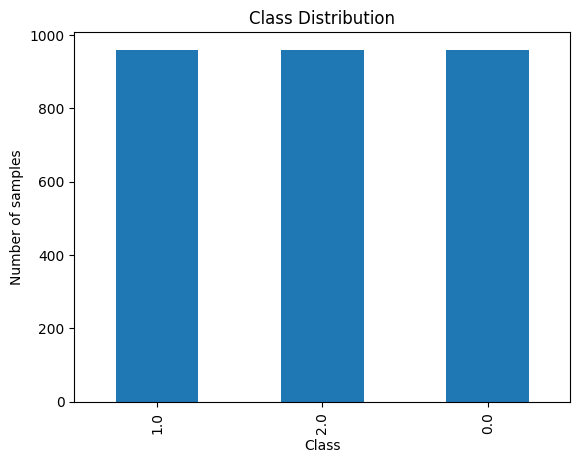

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
a['Class'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.show()


## Choose Classification Model

- XGBoost
- Random Forest 
- Support vector machine (SVM) 
- K-nearest Neighbors (KNN) 
- Multilayer perceptron (MLP)

************************Compare Classification Algorithms*************************
Random Forest: 0.8667 (0.0206)
SVM: 0.3286 (0.0259)
KNN: 0.8029 (0.0143)
MLP: 0.3429 (0.0319)


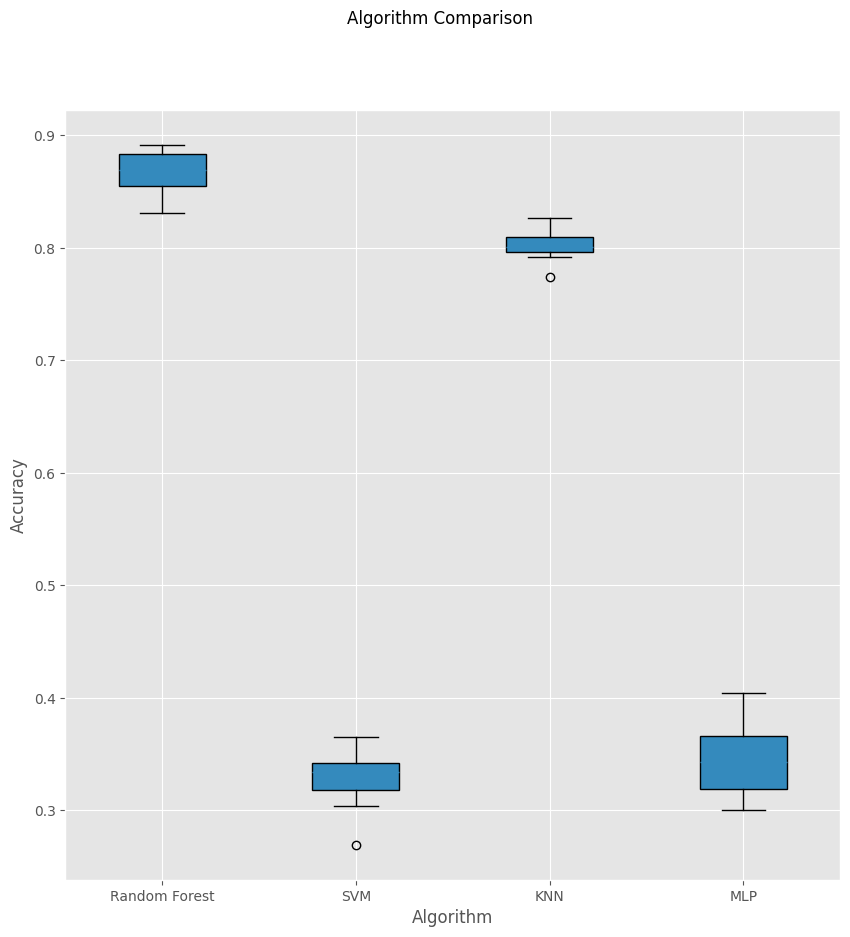

In [12]:
def choose_models():
    print(format("Compare Classification Algorithms", "*^82"))
    plt.style.use('ggplot')
    
    X = a.drop(columns=['Class'])
    y = a['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Prepare the models
    models = []
    models.append(('Random Forest', RandomForestClassifier()))
    models.append(('SVM', SVC()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('MLP', MLPClassifier()))

    # Evaluate each model
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

    # Boxplot algorithm comparison
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results, vert=True, patch_artist=True)
    ax.set_xticklabels(names)
    plt.xlabel('Algorithm')
    plt.ylabel('Accuracy')
    plt.show()
choose_models()

Bước	Mức độ quan trọng	Khi nào cần?
1. Missing Values	⭐⭐⭐⭐⭐	Luôn cần
2. Categorical Encoding	⭐⭐⭐⭐⭐	Nếu có categorical data
3. Outliers	⭐⭐⭐⭐	Với thuật toán nhạy cảm (SVM, Logistic)
4. Scaling	⭐⭐⭐⭐	Với KNN, SVM, Neural Networks
5. Imbalanced Data	⭐⭐⭐	Nếu lớp mất cân bằng nặng
6. Duplicates	⭐⭐	Nếu dữ liệu có trùng lặp
7. Feature Correlation	⭐⭐	Nếu có features tương quan cao
8. Text Cleaning	⭐	Chỉ khi có text data
9. Datetime Handling	⭐	Chỉ khi có ngày tháng

## RandomForest

Accuracy: 0.82
Classification report:
               precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       209
         1.0       0.77      0.81      0.79       183
         2.0       0.79      0.82      0.80       184

    accuracy                           0.82       576
   macro avg       0.82      0.82      0.82       576
weighted avg       0.82      0.82      0.82       576

Confusion Matrix:
 [[172  21  16]
 [  9 149  25]
 [ 10  23 151]]

Feature Importances:
P8       0.033754
F4.1     0.030545
F4       0.029172
AF3      0.021438
F4.7     0.021161
           ...   
O1.4     0.003758
P8.4     0.003744
T8.2     0.003636
P8.2     0.003523
AF3.4    0.003308
Length: 112, dtype: float64


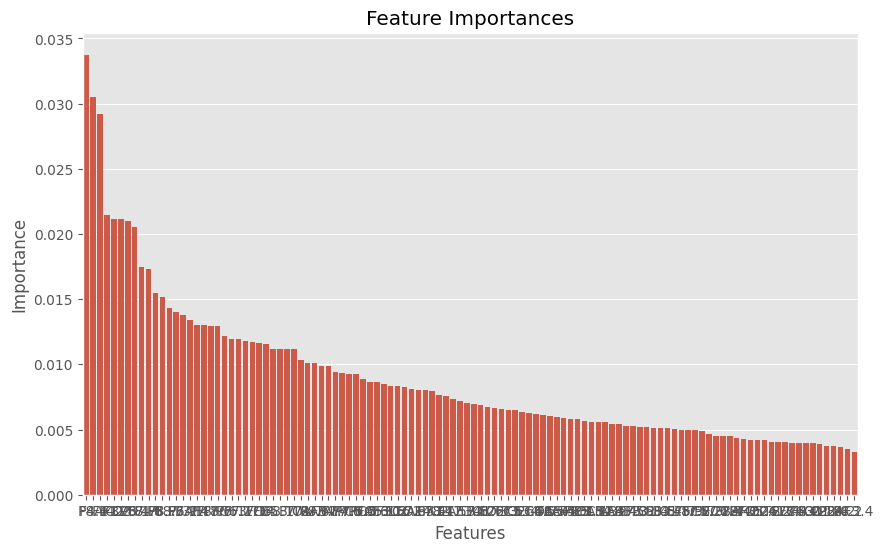


OOB Score: 0.83


In [ ]:
X = a.drop(columns=['Class'])
y = a['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Feature Importance
print("\nFeature Importances:")
importances = model.feature_importances_
feature_importances_series = pd.Series(importances, index=X.columns)
sorted_importances = feature_importances_series.sort_values(ascending=False)
print(sorted_importances)
# Plotting Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances.index, y=sorted_importances.values)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# The error Out-of-Bag (OOB) - chỉ áp dụng khi oob_score=True
print(f"\nOOB Score: {model.oob_score_:.2f}")

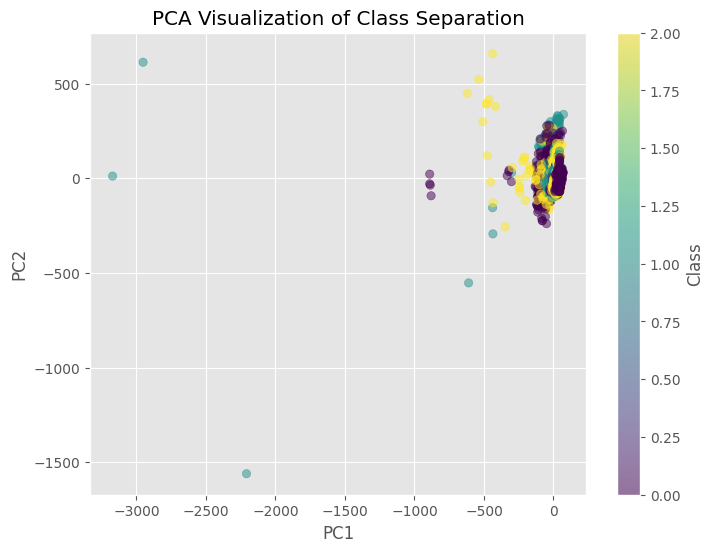

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title("PCA Visualization of Class Separation")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Class")
plt.show()


Mô hình đang hoạt động tốt, không bị overfitting rõ rệt.

Accuracy, F1-score và OOB Score đều quanh mức 82–83%.

Class 1.0 và 2.0 có thể xem xét cải thiện thêm bằng:

Tối ưu hyperparameter (max_depth, n_estimators, v.v.)

Dùng kỹ thuật class balancing nếu dữ liệu lệch lớp

Thử thêm các mô hình khác (XGBoost, LightGBM)

## Improve Model


Top 50 Features:
 ['FC6.1', 'FC6', 'AF4', 'F7', 'F4', 'O2.1', 'O2', 'P8', 'P8.1', 'F7.1', 'AF3', 'F4.7', 'AF4.6', 'T7', 'O2.6', 'AF3.1', 'F4.1', 'F3.3', 'P8.7', 'F8.1', 'O2.7', 'FC5', 'F8', 'FC5.1', 'O1', 'O1.1', 'AF4.1', 'F4.3', 'F4.5', 'O1.7', 'FC6.6', 'AF3.6', 'T7.1', 'F7.7', 'FC5.7', 'F7.6', 'O1.5', 'FC6.7', 'T7.7', 'F3.1', 'F4.6', 'F4.2', 'T7.6', 'O1.6', 'F3.5', 'AF3.7', 'F4.4', 'P8.6', 'FC5.6', 'F3.6']

🔍 Performing hyperparameter tuning with GridSearchCV...
✅ Best Parameters Found: {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 150}

Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       209
         1.0       0.82      0.92      0.87       184
         2.0       0.94      0.89      0.91       183

    accuracy                           0.90       576
   macro avg       0.90      0.90      0.90       576
weighted avg       0.90      0.90      0.90       576

Confusion Matrix:
 [[

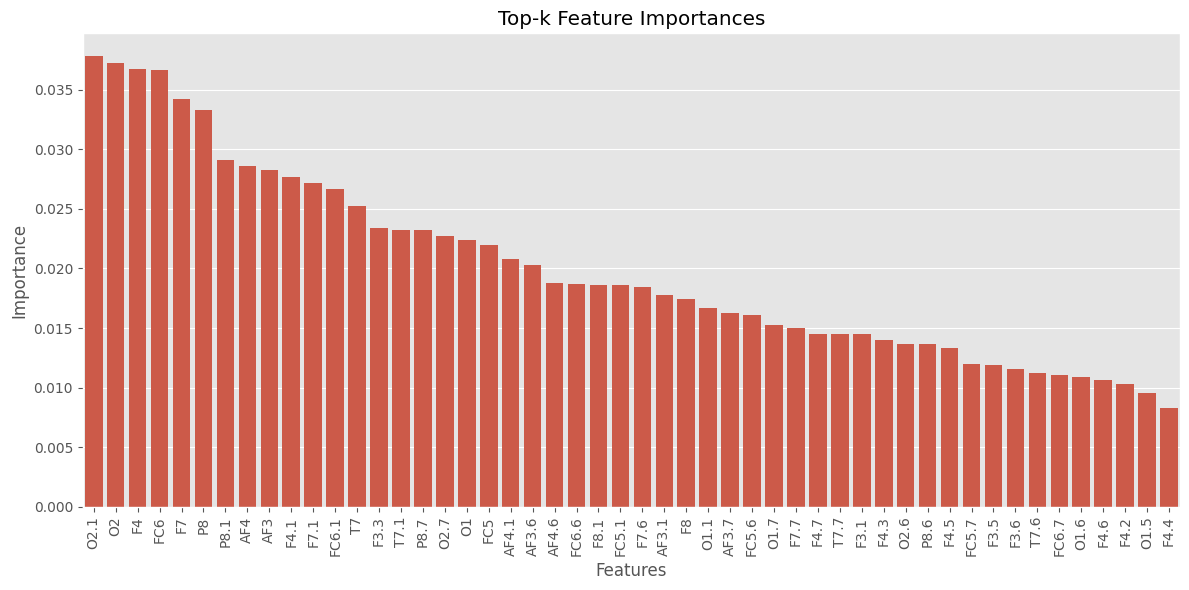


OOB Score: 0.88

Model and top-k features saved successfully.


In [68]:
def rf_classifier(data, top_k=int, tune_hyper = False):
    X = b.drop(columns=['Class'])
    y = b['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a temporary model to get feature importances
    temp_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    temp_model.fit(X_train, y_train)
    importances = temp_model.feature_importances_
    feature_importances_series = pd.Series(importances, index=X.columns)
    top_k_features = feature_importances_series.sort_values(ascending=False).head(top_k).index.tolist()
    print(f"\nTop {top_k} Features:\n", top_k_features)

    # Filter data by top-k
    X_train_top = X_train[top_k_features]
    X_test_top = X_test[top_k_features]

    # Train the final model with top-k features
    if tune_hyper:
        print("\n🔍 Performing hyperparameter tuning with GridSearchCV...")
        param_grid = {
            'n_estimators': [100, 150],
            'max_depth': [8, 10, 12],
            'min_samples_split': [2, 4],
        }
        grid = GridSearchCV(RandomForestClassifier(random_state=42, oob_score=True),
                            param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train_top, y_train)
        model = grid.best_estimator_
        print("✅ Best Parameters Found:", grid.best_params_)
    else:
        model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, oob_score=True)
        model.fit(X_train_top, y_train)

    y_pred = model.predict(X_test_top)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Plot feature importances for top-k features
    final_importances = model.feature_importances_
    sorted_importances = pd.Series(final_importances, index=top_k_features).sort_values(ascending=False)

    print("\nFeature Importances:")
    print(sorted_importances)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=sorted_importances.index, y=sorted_importances.values)
    plt.xticks(rotation=90)
    plt.title('Top-k Feature Importances')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.show()

    print(f"\nOOB Score: {model.oob_score_:.2f}")

    # Save model
    joblib.dump(model, "rf_model.pkl")
    joblib.dump(top_k_features, "top_k_features.pkl")
    print("\nModel and top-k features saved successfully.")

    return model

model = rf_classifier(b, top_k=50, tune_hyper=True)